### Define variables, import packages and functions ###

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from time import time
from numpy import array
from numpy.linalg import norm, eig, svd, eigvals, inv
from scipy.stats import multivariate_normal




In [42]:
df_prices = pd.read_csv('/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/FinTech545_Fall2023/Week03/assign2/dailyprices.csv')
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.sample(5)

,Date,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
19,2022-03-14,410.342865,149.713074,274.440063,141.852997,255.456665,125.950996,126.740997,186.630005,213.137024,...,176.810699,57.951672,46.706055,143.621460,56.321217,436.059631,242.781448,40.646603,55.457031,60.168510
36,2022-04-06,440.756653,170.795380,297.333191,158.755997,348.586670,136.548004,137.175995,223.300003,243.883530,...,174.496414,62.075661,50.602207,158.069397,58.907246,445.998383,265.528534,39.322571,52.439419,59.461224
249,2023-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2022-03-07,412.734070,158.340820,276.892181,137.453003,268.193329,126.378502,126.464500,187.470001,213.356873,...,172.317123,61.067039,48.840820,144.262482,57.630264,457.349945,250.247101,39.651093,53.866802,57.300072
167,2022-10-13,364.297150,142.535583,233.581741,112.529999,221.720001,99.059998,99.709999,130.289993,119.569412,...,150.124146,57.347710,44.961132,142.117325,65.913338,403.444214,213.435532,32.687305,43.104916,64.671265


In [43]:
df_return = pd.read_csv('/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/FinTech545_Fall2023/Week03/assign2/dailyreturn.csv',index_col=0).values
df_return

array([[-0.00326927,  0.00142316, -0.00013552, ..., -0.00880617,
        -0.00912233, -0.0103348 ],
       [ 0.01612677,  0.02315237,  0.01854226, ...,  0.02623964,
         0.02857135,  0.01323725],
       [ 0.00112079, -0.00138889, -0.00116727, ...,  0.01530102,
        -0.00138886, -0.02598343],
       ...,
       [ 0.01307863,  0.01924467,  0.04202208, ...,  0.00145141,
         0.00866936, -0.00361827],
       [-0.01093477, -0.01765271, -0.00310206, ...,  0.00410624,
        -0.01539076,  0.00936335],
       [-0.00866918, -0.00691154, -0.01165979, ...,  0.00144338,
        -0.01661874,  0.00560334]])

In [44]:
df_return_2 = pd.read_csv('/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/FinTech545_Fall2023/Week03/assign2/dailyreturn.csv')
df_return_2.head()

df_return_2 = df_return_2.iloc[:,1:]

df_return_2

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,-0.003269,0.001423,-0.000136,0.012222,0.018326,0.009260,0.008723,-0.008426,0.013278,-0.015228,...,-0.013455,-0.008396,-0.005559,0.000520,-0.015466,-0.023272,-0.004768,-0.008806,-0.009122,-0.010335
1,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028571,0.013237
2,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,-0.001739,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025983
3,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,-0.006653,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030856,-0.031925,-0.033380,-0.028763
4,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,0.003987,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.010629,0.024400,-0.023621,-0.084315,0.009083,-0.027474,-0.032904,-0.011866,-0.028053,-0.010742,...,-0.004694,-0.011251,-0.001277,-0.002677,0.038211,0.004134,0.002336,-0.008916,-0.005954,0.001617
245,-0.006111,-0.017929,-0.006116,-0.011703,0.025161,-0.017942,-0.016632,-0.002520,-0.000521,-0.000259,...,-0.014451,0.003945,0.001066,-0.007102,0.022012,0.021826,-0.041181,0.005106,-0.009782,-0.004595
246,0.013079,0.019245,0.042022,-0.000685,0.010526,0.046064,0.044167,0.029883,0.051401,0.014720,...,-0.000368,-0.016473,-0.008518,0.019544,-0.003590,-0.001641,0.003573,0.001451,0.008669,-0.003618
247,-0.010935,-0.017653,-0.003102,-0.020174,0.022763,-0.076830,-0.074417,-0.042741,0.001443,-0.014346,...,-0.008469,-0.004456,-0.001289,-0.018009,-0.004416,0.002819,-0.015526,0.004106,-0.015391,0.009363


### Problem 1 ###

Use the stock returns in DailyReturn.csv for this problem. DailyReturn.csv contains returns for 100 large US stocks and as well as the ETF, SPY which tracks the S&P500.
Create a routine for calculating an exponentially weighted covariance matrix. If you have a package that calculates it for you, verify that it calculates the values you expect. This means you still have to implement it.

Vary λ ∈ (0, 1). Use PCA and plot the cumulative variance explained by each eigenvalue for each λchosen.
What does this tell us about values of λ and the effect it has on the covariance matrix?



In [45]:

# sample lambda value
lambda_value = 0.90

# zero matrix initialization
exponential_covar = np.zeros((len(df_return_2.columns), len(df_return_2.columns)))

for i in range(len(df_return_2.columns)):
    for j in range(i, len(df_return_2.columns)):
        # weights calculation
        weights = [(1 - lambda_value) * (lambda_value ** (k - 1)) for k in range(1, len(df_return_2) + 1)]
        weights = np.array(weights) / np.sum(weights)
        weights = sorted(weights)
        
        # Calculating mean
        mean_i = df_return_2.iloc[:, i].mean()
        mean_j = df_return_2.iloc[:, j].mean()
        
        # Calculate the weighted covariance
        exponential_covar [i][j] = (weights * ((df_return_2.iloc[:, i] - mean_i) * (df_return_2.iloc[:, j] - mean_j))).sum()
        exponential_covar [j][i] = exponential_covar [i][j]

print(exponential_covar.shape)
print(exponential_covar)

(100, 100)
[[ 1.17707594e-04  1.40177558e-04  2.14560259e-04 ...  1.69837792e-04
   1.11329491e-04 -1.59189840e-05]
 [ 1.40177558e-04  3.31287102e-04  2.61406297e-04 ...  2.39473361e-04
   1.41527162e-04 -4.98735290e-05]
 [ 2.14560259e-04  2.61406297e-04  5.25420088e-04 ...  3.31619057e-04
   1.61209052e-04 -7.71381526e-05]
 ...
 [ 1.69837792e-04  2.39473361e-04  3.31619057e-04 ...  8.14491219e-04
   1.62920573e-04 -5.48939877e-05]
 [ 1.11329491e-04  1.41527162e-04  1.61209052e-04 ...  1.62920573e-04
   2.08680724e-04 -2.51358618e-05]
 [-1.59189840e-05 -4.98735290e-05 -7.71381526e-05 ... -5.48939877e-05
  -2.51358618e-05  1.12119481e-04]]


In [46]:
def ewma_covariance(X, alpha):
    n, m = X.shape
    weights = np.exp(-alpha * np.arange(n))
    weighted_X = X * weights[:, np.newaxis]
    covariance = np.dot(weighted_X.T, weighted_X) / weights.sum()
    return covariance


In [47]:
covariance = ewma_covariance(df_return_2, alpha=0.90)
print(covariance.shape)
print(covariance)

(100, 100)
[[3.31288992e-05 3.51038609e-05 3.12861464e-05 ... 6.07443699e-05
  6.47993835e-05 4.21432754e-05]
 [3.51038609e-05 5.50976343e-05 4.37430679e-05 ... 5.37013530e-05
  5.91437919e-05 2.35296029e-05]
 [3.12861464e-05 4.37430679e-05 3.61116925e-05 ... 5.06746705e-05
  5.53689752e-05 2.76107005e-05]
 ...
 [6.07443699e-05 5.37013530e-05 5.06746705e-05 ... 1.20200750e-04
  1.23741045e-04 8.41065742e-05]
 [6.47993835e-05 5.91437919e-05 5.53689752e-05 ... 1.23741045e-04
  1.32493475e-04 9.61948963e-05]
 [4.21432754e-05 2.35296029e-05 2.76107005e-05 ... 8.41065742e-05
  9.61948963e-05 9.38742255e-05]]


In [48]:
lambda_values = [0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99]
results = {}

for lambda_value in lambda_values:

    # zero matrix initialization
    exponential_covar = np.zeros((len(df_return_2.columns), len(df_return_2.columns)))

    for i in range(len(df_return_2.columns)):
        for j in range(i, len(df_return_2.columns)):
            # weights calculation
            weights = [(1 - lambda_value) * (lambda_value ** (k - 1)) for k in range(1, len(df_return_2) + 1)]
            weights = np.array(weights) / np.sum(weights)
            weights = sorted(weights)

            # Calculating mean
            mean_i = df_return_2.iloc[:, i].mean()
            mean_j = df_return_2.iloc[:, j].mean()

            # Calculate the weighted covariance
            exponential_covar[i][j] = (weights * ((df_return_2.iloc[:, i] - mean_i) * (df_return_2.iloc[:, j] - mean_j))).sum()
            exponential_covar[j][i] = exponential_covar[i][j]

    results[lambda_value] = exponential_covar


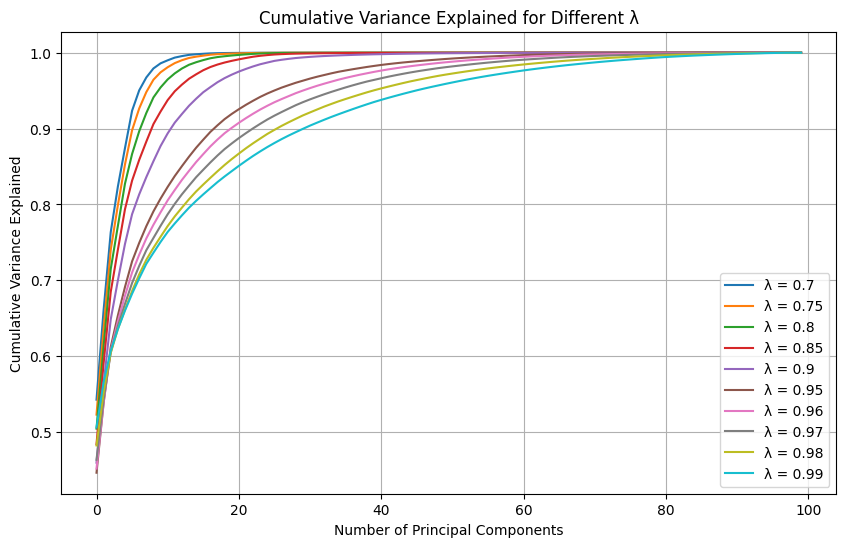

In [49]:
lambda_values = [0.7, 0.75, 0.80, 0.85, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99]

cumulative_variances = []

for lambda_value in lambda_values:
    # Get the covariance matrix for the lambda value
    exponential_covar = results[lambda_value]
    
    # PCA on the covariance matrix
    eigenvalues, _ = np.linalg.eigh(exponential_covar)
    eigenvalues = eigenvalues[::-1]  # Sort in descending order
    cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    cumulative_variances.append(cumulative_variance)

# Plot the cumulative variances
plt.figure(figsize=(10, 6))
for i, lambda_value in enumerate(lambda_values):
    plt.plot(cumulative_variances[i], label=f'λ = {lambda_value}')

plt.title('Cumulative Variance Explained for Different λ')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()


### Problem 2 ###

Copy the chol_psd(), and near_psd() functions from the course repository – implement in your programming language of choice. These are core functions you will need throughout the remainder of the class.
Implement Higham’s 2002 nearest psd correlation function.
Generate a non-psd correlation matrix that is 500x500. You can use the code I used in class:
n=500

Use near_psd() and Higham’s method to fix the matrix. Confirm the matrix is now PSD.
Compare the results of both using the Frobenius Norm. Compare the run time between the two. How does the run time of each function compare as N increases?
Based on the above, discuss the pros and cons of each method and when you would use each. There is no wrong answer here, I want you to think through this and tell me what you think.



In [50]:
def chol_psd_python(A):
  n = A.shape[1]
  root = np.zeros_like(A)
  
  for i in range(n):
    s = 0.0
    if i > 0:
      # s = root[i][:i].T @ root[i][:i]
      s = np.dot(root[i][:i], root[i][:i])
    
    
    # Diagonal matrix elements
    temp = A[i][i] - s
    if temp <= 0 and temp >= -1e-8:
      temp = 0.0
    root[i][i] = np.sqrt(temp)

    if root[i][i] == 0:
      root[i][(i+1):n] = 0
    else:
      
      ir = 1.0/root[i][i]
      for j in np.arange(i+1,n):
        s = np.dot(root[i, :j], root[j, :j])

        root[j][i] = (A[j][i] -s) * ir
  return root

In [51]:
n = 500
a = np.ones((n,n)) * 0.9
for i in range(n):
  a[i,i] = 1.0
a[0,1] = 1.0
a[1,0] = 1.0


chol_psd_python(a)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.00000000e-01, 0.00000000e+00, 4.35889894e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.00000000e-01, 0.00000000e+00, 2.06474160e-01, ...,
        3.16546312e-01, 0.00000000e+00, 0.00000000e+00],
       [9.00000000e-01, 0.00000000e+00, 2.06474160e-01, ...,
        6.36771750e-04, 3.16545672e-01, 0.00000000e+00],
       [9.00000000e-01, 0.00000000e+00, 2.06474160e-01, ...,
        6.36771750e-04, 6.35492091e-04, 3.16545034e-01]])

In [52]:
def near_psd(a, epsilon=0.0):
    n = a.shape[0]

    invSD = None
    out = np.copy(a)
    # print(out)

    # Calculate the correlation matrix if we got a covariance
    if np.count_nonzero(np.isclose(np.diag(out), 1.0)) != n:
        invSD = np.diag(1.0 / np.sqrt(np.diag(out)))
        out = np.dot(np.dot(invSD, out), invSD)

    # SVD, update the eigen value and scale
    eigenvals, eigenvecs = np.linalg.eigh(out)
    # eigenvals = np.maximum(eigenvals, epsilon * np.max(eigenvals))
    eigenvals = np.maximum(eigenvals, epsilon)
    T = 1.0 / (np.dot(np.dot(eigenvecs, np.diag(eigenvals)), eigenvecs.T))

    T = np.diag(np.sqrt(np.diag(T)))
    l = np.sqrt(np.diag(eigenvals))
    B = np.dot(np.dot(T, eigenvecs), l)
    out = np.dot(B, B.T)

    # Add back the variance
    if invSD is not None:
        invSD = np.diag(1.0 / np.diag(invSD))
        out = np.dot(np.dot(invSD, out), invSD)

    return out


In [53]:
n = 500
a = np.ones((n,n)) * 0.9
for i in range(n):
  a[i,i] = 1.0
a[0,1] = 0.7357
a[1,0] = 0.7357

near_psd(a)

array([[1.        , 0.74381947, 0.88594237, ..., 0.88594237, 0.88594237,
        0.88594237],
       [0.74381947, 1.        , 0.88594237, ..., 0.88594237, 0.88594237,
        0.88594237],
       [0.88594237, 0.88594237, 1.        , ..., 0.90000005, 0.90000005,
        0.90000005],
       ...,
       [0.88594237, 0.88594237, 0.90000005, ..., 1.        , 0.90000005,
        0.90000005],
       [0.88594237, 0.88594237, 0.90000005, ..., 0.90000005, 1.        ,
        0.90000005],
       [0.88594237, 0.88594237, 0.90000005, ..., 0.90000005, 0.90000005,
        1.        ]])

In [54]:
#highams function
def highams(A, max_iter=100, tol=1e-6):
    n = A.shape[0]
    X = np.copy(A)
    I = np.eye(n)
    
    for _ in range(max_iter):
        # Eigenvalue decomposition
        eigvals, eigvecs = np.linalg.eigh(X)
        
        # Adjust eigenvalues
        D = np.diag(np.maximum(eigvals, 0))
        
        # Reconstruct matrix
        X = eigvecs @ D @ eigvecs.T
        
        # Ensure symmetry
        X = (X + X.T) / 2
        
        # Check for convergence
        if np.linalg.norm(X - A) < tol:
            break
    
    return X

In [55]:
n = 500
a = np.full((n, n), 0.9)
for i in range(n):
    a[i, i] = 1.0
a[0, 1] = 0.7357
a[1, 0] = 0.7357

print(highams(a, max_iter=100, tol=1e-6))

[[1.03169433 0.76739433 0.89987276 ... 0.89987276 0.89987276 0.89987276]
 [0.76739433 1.03169433 0.89987276 ... 0.89987276 0.89987276 0.89987276]
 [0.89987276 0.89987276 1.00000051 ... 0.90000051 0.90000051 0.90000051]
 ...
 [0.89987276 0.89987276 0.90000051 ... 1.00000051 0.90000051 0.90000051]
 [0.89987276 0.89987276 0.90000051 ... 0.90000051 1.00000051 0.90000051]
 [0.89987276 0.89987276 0.90000051 ... 0.90000051 0.90000051 1.00000051]]


In [56]:
#for comparison
n = 500
sigma = np.full((n, n), 0.9)
for i in range(n):
    sigma[i, i] = 1.0
sigma[0, 1] = 0.7357
sigma[1, 0] = 0.7357


In [63]:
# Use near_psd() and Higham’s method to fix the matrix. Confirm the matrix is now PSD.
# Fix matrix using near_psd()
t0 = time()
nearpsd_sigma = near_psd(sigma, epsilon=0.0)
t1 = time() - t0

# Fix matrix using Higham's method
t0 = time()
higham_sigma= highams(sigma, max_iter=100, tol=1e-6)
t2 = time() - t0

# Confirming fixed matrices are PSD
assert np.all(np.linalg.eigvals(nearpsd_sigma) >= 0)
assert np.all(np.linalg.eigvals(higham_sigma) >= 0)

# Compare Frobenius Norm 
original_norm = norm(sigma, 'fro')
nearpsd_norm = norm(nearpsd_sigma - sigma, 'fro')
higham_norm = norm(higham_sigma - sigma, 'fro')

print(f"Original Frobenius norm: {original_norm:.4f}")
print(f"Near PSD Frobenius norm: {nearpsd_norm:.4f}")
print(f"Higham's method Frobenius norm: {higham_norm:.4f}")
print(f"Near PSD runtime: {t1:.4f}s")
print(f"Higham's method runtime: {t2:.4f}s")

Original Frobenius norm: 450.1049
Near PSD Frobenius norm: 0.6275
Higham's method Frobenius norm: 0.0636
Near PSD runtime: 0.1169s
Higham's method runtime: 10.2910s


AS N INCREASES:

creating several scenarious: 
N = 500
N = 1000
N = 2000
N = 5000

N = 5

In [34]:
n = 50
sigma1 = np.full((n, n), 0.9)
for i in range(n):
    sigma1[i, i] = 1.0
sigma1[0, 1] = 0.7357
sigma1[1, 0] = 0.7357

N = 50

In [58]:

# Define functions (near_psd and highams) here...

n = 50
sigma1 = np.full((n, n), 0.9)
for i in range(n):
    sigma1[i, i] = 1.0
sigma1[0, 1] = 0.7357
sigma1[1, 0] = 0.7357

t0 = time()
nearpsd_sigma = near_psd(sigma1, epsilon=0.0)
t1 = time() - t0

t0 = time()
higham_sigma = highams(sigma1, max_iter=100, tol=1e-6)
t2 = time() - t0

# Confirming fixed matrices are PSD
# assert np.all(np.linalg.eigvals(nearpsd_sigma) >= 0)
# assert np.all(np.linalg.eigvals(higham_sigma) >= 0)

# Compare Frobenius Norm 
original_norm = norm(sigma1, 'fro')
nearpsd_norm = norm(nearpsd_sigma - sigma1, 'fro')
higham_norm = norm(higham_sigma - sigma1, 'fro')

print(f"Original Frobenius norm: {original_norm:.4f}")
print(f"Near PSD Frobenius norm: {nearpsd_norm:.4f}")
print(f"Higham's method Frobenius norm: {higham_norm:.4f}")
print(f"Near PSD runtime: {t1:.4f}s")
print(f"Higham's method runtime: {t2:.4f}s")


Original Frobenius norm: 45.0995
Near PSD Frobenius norm: 0.1857
Higham's method Frobenius norm: 0.0578
Near PSD runtime: 0.0043s
Higham's method runtime: 0.1203s


N = 100

In [60]:
n = 100
sigma1 = np.full((n, n), 0.9)
for i in range(n):
    sigma1[i, i] = 1.0
sigma1[0, 1] = 0.7357
sigma1[1, 0] = 0.7357

t0 = time()
nearpsd_sigma = near_psd(sigma1, epsilon=0.0)
t1 = time() - t0

t0 = time()
higham_sigma = highams(sigma1, max_iter=100, tol=1e-6)
t2 = time() - t0

# Confirming fixed matrices are PSD
# assert np.all(np.linalg.eigvals(nearpsd_sigma) >= 0)
# assert np.all(np.linalg.eigvals(higham_sigma) >= 0)

# Compare Frobenius Norm 
original_norm = norm(sigma1, 'fro')
nearpsd_norm = norm(nearpsd_sigma - sigma1, 'fro')
higham_norm = norm(higham_sigma - sigma1, 'fro')

print(f"Original Frobenius norm: {original_norm:.4f}")
print(f"Near PSD Frobenius norm: {nearpsd_norm:.4f}")
print(f"Higham's method Frobenius norm: {higham_norm:.4f}")
print(f"Near PSD runtime: {t1:.4f}s")
print(f"Higham's method runtime: {t2:.4f}s")


Original Frobenius norm: 90.1025
Near PSD Frobenius norm: 0.2728
Higham's method Frobenius norm: 0.0610
Near PSD runtime: 0.0292s
Higham's method runtime: 1.2482s


N = 1000

In [64]:
n = 1000
sigma1 = np.full((n, n), 0.9)
for i in range(n):
    sigma1[i, i] = 1.0
sigma1[0, 1] = 0.7357
sigma1[1, 0] = 0.7357

t0 = time()
nearpsd_sigma = near_psd(sigma1, epsilon=0.0)
t1 = time() - t0

t0 = time()
higham_sigma = highams(sigma1, max_iter=100, tol=1e-6)
t2 = time() - t0

# Compare Frobenius Norm 
original_norm = norm(sigma1, 'fro')
nearpsd_norm = norm(nearpsd_sigma - sigma1, 'fro')
higham_norm = norm(higham_sigma - sigma1, 'fro')

print(f"Original Frobenius norm: {original_norm:.4f}")
print(f"Near PSD Frobenius norm: {nearpsd_norm:.4f}")
print(f"Higham's method Frobenius norm: {higham_norm:.4f}")
print(f"Near PSD runtime: {t1:.4f}s")
print(f"Higham's method runtime: {t2:.4f}s")


Original Frobenius norm: 900.1053
Near PSD Frobenius norm: 0.8905
Higham's method Frobenius norm: 0.0640
Near PSD runtime: 0.3709s
Higham's method runtime: 35.8140s


Problem 3

Using DailyReturn.csv.
Implement a multivariate normal simulation that allows for simulation directly from a covariance matrix or using PCA with an optional parameter for % variance explained. If you have a library that can do these, you still need to implement it yourself for this homework and prove that it functions as expected.
Generate a correlation matrix and variance vector 2 ways:
1. Standard Pearson correlation/variance (you do not need to reimplement the cor() and
var() functions).
2. Exponentially weighted λ = 0. 97
Combine these to form 4 different covariance matrices. (Pearson correlation + var()), Pearson correlation + EW variance, etc.)


Simulate 25,000 draws from each covariance matrix using:
1. Direct Simulation
2. PCA with 100% explained.
3. PCA with 75% explained.
4. PCA with 50% explained.
Calculate the covariance of the simulated values. Compare the simulated covariance to it’s input matrix using the Frobenius Norm (L2 norm, sum of the square of the difference between the matrices). Compare the run times for each simulation.
What can we say about the trade offs between time to run and accuracy.


In [68]:
import numpy as np
import pandas as pd

pearson_correlation = df_return_2.corr()

# Calculate variance vector
variance_vector = df_return_2.var()

# Print the results
print("Standard Pearson Correlation Matrix:")
print(pearson_correlation)

print("\nVariance Vector:")
print(variance_vector)

Standard Pearson Correlation Matrix:
           SPY      AAPL      MSFT      AMZN      TSLA     GOOGL      GOOG   
SPY   1.000000  0.878502  0.871615  0.802612  0.622632  0.821177  0.816041  \
AAPL  0.878502  1.000000  0.808246  0.695649  0.642293  0.782998  0.774306   
MSFT  0.871615  0.808246  1.000000  0.759519  0.544875  0.838152  0.833708   
AMZN  0.802612  0.695649  0.759519  1.000000  0.563224  0.758671  0.758619   
TSLA  0.622632  0.642293  0.544875  0.563224  1.000000  0.531558  0.525962   
...        ...       ...       ...       ...       ...       ...       ...   
LMT   0.281978  0.230836  0.191081  0.112425  0.129147  0.131568  0.123723   
SYK   0.744547  0.578140  0.603315  0.561070  0.356250  0.578022  0.574602   
GM    0.756314  0.648683  0.607863  0.604521  0.583687  0.581055  0.581101   
TFC   0.725000  0.572295  0.555242  0.521690  0.353417  0.538574  0.539629   
TJX   0.613090  0.462893  0.470468  0.467784  0.387339  0.438891  0.443678   

          META      NVDA  

In [110]:
pearson_correlation = df_return_2.corr()

# Calculate variance vector
variance_vector = df_return_2.var()

variance_diagonal = np.diag(variance_vector)

# Combine to form Pearson covariance matrix
pearson_covariance = np.dot(variance_diagonal, pearson_correlation).dot(variance_diagonal)

print("Pearson Covariance Matrix:")
print(pearson_covariance)

weighted_variance_vector = np.var(df_return_2, axis=0) * (1 - lambda_value)

for i in range(1, df_return_2.shape[0]):
    weighted_variance_vector += lambda_value**(df_return_2.shape[0]-i) * np.var(df_return_2[i:], axis=0)

weighted_variance_diagonal = np.diag(weighted_variance_vector)

ewvar_pear_corr = np.dot(weighted_variance_diagonal, pearson_correlation)


print("Combined Matrix (Pearson Correlation * EW Variance):")
print(ewvar_pear_corr)


weighted_mean = np.mean(df_return_2, axis=0) * (1 - lambda_value)

for i in range(1, df_return_2.shape[0]):
    weighted_mean += lambda_value**(df_return_2.shape[0]-i) * np.mean(df_return_2[i:], axis=0)

weighted_covariance = np.zeros((df_return_2.shape[1], df_return_2.shape[1]))

for i in range(df_return_2.shape[0]):
    diff = df_return_2.iloc[i] - weighted_mean
    weighted_covariance += lambda_value**(df_return_2.shape[0]-i) * np.outer(diff, diff)

weighted_std_dev = np.sqrt(np.diag(weighted_covariance))
weighted_correlation = weighted_covariance / (weighted_std_dev[:, None] * weighted_std_dev[None, :])

# Calculate exponentially weighted variance vector
weighted_variance_vector = np.var(df_return_2, axis=0) * (1 - lambda_value)

for i in range(1, df_return_2.shape[0]):
    weighted_variance_vector += lambda_value**(df_return_2.shape[0]-i) * np.var(df_return_2[i:], axis=0)

# Convert exponentially weighted variance vector into a diagonal matrix
weighted_variance_diagonal = np.diag(weighted_variance_vector)

# Combine to form one matrix
ewvar_ewcorr = np.dot(weighted_variance_diagonal, weighted_correlation)

# Print the resulting combined matrix
print("Combined Matrix (EW Correlation * EW Variance):")
print(ewvar_ewcorr)


pearson_variance_vector = df_return_2.var()

weighted_mean = np.mean(df_return_2, axis=0) * (1 - lambda_value)

for i in range(1, df_return_2.shape[0]):
    weighted_mean += lambda_value**(df_return_2.shape[0]-i) * np.mean(df_return_2[i:], axis=0)

weighted_covariance = np.zeros((df_return_2.shape[1], df_return_2.shape[1]))

for i in range(df_return_2.shape[0]):
    diff = df_return_2.iloc[i] - weighted_mean
    weighted_covariance += lambda_value**(df_return_2.shape[0]-i) * np.outer(diff, diff)

weighted_std_dev = np.sqrt(np.diag(weighted_covariance))
weighted_correlation = weighted_covariance / (weighted_std_dev[:, None] * weighted_std_dev[None, :])

# Convert Pearson variance vector into a diagonal matrix
pearson_variance_diagonal = np.diag(pearson_variance_vector)

# Combine to form one matrix
pear_var_ew_corr = np.dot(pearson_variance_diagonal, weighted_correlation)

# Print the resulting combined matrix
print("Combined Matrix (Pearson Variance * EW Correlation):")
print(pear_var_ew_corr)




Pearson Covariance Matrix:
[[5.29006725e-08 1.01323535e-07 1.01289348e-07 ... 1.34262812e-07
  6.86578209e-08 5.89320471e-08]
 [1.01323535e-07 2.51462647e-07 2.04780688e-07 ... 2.51068676e-07
  1.18161977e-07 9.70094650e-08]
 [1.01289348e-07 2.04780688e-07 2.55280083e-07 ... 2.37048300e-07
  1.15508116e-07 9.93425615e-08]
 ...
 [1.34262812e-07 2.51068676e-07 2.37048300e-07 ... 5.95725299e-07
  1.88643376e-07 1.70412663e-07]
 [6.86578209e-08 1.18161977e-07 1.15508116e-07 ... 1.88643376e-07
  1.69528503e-07 9.29254248e-08]
 [5.89320471e-08 9.70094650e-08 9.93425615e-08 ... 1.70412663e-07
  9.29254248e-08 1.74660209e-07]]
Combined Matrix (Pearson Correlation * EW Variance):
[[0.00389462 0.00342143 0.00339461 ... 0.00294556 0.0028236  0.00238775]
 [0.00925798 0.01053836 0.00851759 ... 0.00683606 0.00603105 0.00487813]
 [0.01305574 0.01210656 0.0149788  ... 0.00910505 0.00831686 0.00704704]
 ...
 [0.01599776 0.01372113 0.01285767 ... 0.02115227 0.01255608 0.01117478]
 [0.0052608  0.00415272

In [117]:
np.random.seed(0)
# Number of draws
num_draws = 25000

# Simulate draws using direct simulation
mean_pear = np.zeros(pearson_covariance.shape[0]) 
simulated_values_pearson = np.random.multivariate_normal(mean_pear, pearson_covariance, num_draws)

# Calculate the covariance of the simulated values
simulated_covariance_pearson = np.cov(simulated_values_pearson, rowvar=False)

# Calculate the Frobenius Norm
frobenius_norm_pearson = np.linalg.norm(simulated_covariance_pearson - pearson_covariance, 'fro')

# Print the covariance matrix and Frobenius Norm
print("Simulated Covariance Matrix (Pearson):")
print(simulated_covariance_pearson)
print("\nFrobenius Norm (Pearson):", frobenius_norm_pearson)

# Simulate draws using direct simulation
mean_ewvar = np.zeros(ewvar_pear_corr.shape[0]) 
simulated_values_ew = np.random.multivariate_normal(mean_ewvar, ewvar_pear_corr, num_draws)


# Calculate the covariance of the simulated values
simulated_covariance_ew = np.cov(simulated_values_ew, rowvar=False)

# Calculate the Frobenius Norm
frobenius_norm_ew = np.linalg.norm(simulated_covariance_ew - ewvar_pear_corr, 'fro')

# Print the covariance matrix and Frobenius Norm
print("Simulated Covariance Matrix(EWcov):")
print(simulated_covariance_ew)
print("\nFrobenius Norm:", frobenius_norm_ew)

# Simulate draws using direct simulation
mean_ewvar_corr = np.zeros(ewvar_ewcorr.shape[0])  # Assuming zero mean
simulated_values_ewvar_corr = np.random.multivariate_normal(mean_ewvar_corr, ewvar_ewcorr, num_draws)


simulated_covariance_ewvar_corr = np.cov(simulated_values_ewvar_corr, rowvar=False)

# Calculate the Frobenius Norm
frobenius_norm_ewvar_corr = np.linalg.norm(simulated_covariance_ewvar_corr - ewvar_ewcorr, 'fro')

# Print the covariance matrix and Frobenius Norm
print("Simulated Covariance Matrix(EWvar_corr):")
print(simulated_covariance_ewvar_corr)
print("\nFrobenius Norm:", frobenius_norm_ewvar_corr)



# Simulate draws using direct simulation(4)

# Simulate draws using direct simulation
mean_pear_ew = np.zeros(pear_var_ew_corr.shape[0])  # Assuming zero mean
simulated_values_4 = np.random.multivariate_normal(mean_pear_ew, pear_var_ew_corr, num_draws)


simulated_covariance_4 = np.cov(simulated_values_4, rowvar=False)

# Calculate the Frobenius Norm
frobenius_norm_4 = np.linalg.norm(simulated_values_4  - pear_var_ew_corr, 'fro')

# Print the covariance matrix and Frobenius Norm
print("Simulated Covariance Matrix(EWvar_corr):")
print(simulated_values_4 )
print("\nFrobenius Norm:", frobenius_norm_4)


Simulated Covariance Matrix (Pearson):
[[5.21781681e-08 9.96982012e-08 9.95466001e-08 ... 1.33560839e-07
  6.76139552e-08 5.88024359e-08]
 [9.96982012e-08 2.47543252e-07 2.01265581e-07 ... 2.47592714e-07
  1.15453147e-07 9.69108509e-08]
 [9.95466001e-08 2.01265581e-07 2.51434420e-07 ... 2.35207390e-07
  1.12904661e-07 9.95931752e-08]
 ...
 [1.33560839e-07 2.47592714e-07 2.35207390e-07 ... 5.98325447e-07
  1.87814761e-07 1.71232917e-07]
 [6.76139552e-08 1.15453147e-07 1.12904661e-07 ... 1.87814761e-07
  1.69077060e-07 9.16801554e-08]
 [5.88024359e-08 9.69108509e-08 9.95931752e-08 ... 1.71232917e-07
  9.16801554e-08 1.74989419e-07]]

Frobenius Norm (Pearson): 2.5551409429445953e-07
Simulated Covariance Matrix(EWcov):
[[0.01836951 0.01717949 0.01725294 ... 0.0144919  0.01217266 0.01073723]
 [0.01717949 0.01901685 0.01662889 ... 0.01338215 0.01045905 0.00919302]
 [0.01725294 0.01662889 0.01995748 ... 0.01218452 0.01049746 0.00902619]
 ...
 [0.0144919  0.01338215 0.01218452 ... 0.01966895 0

/var/folders/72/nxfcp8kj65bbt3qtv2krff1w0000gn/T/ipykernel_17731/1001449376.py:22: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  simulated_values_ew = np.random.multivariate_normal(mean_ewvar, ewvar_pear_corr, num_draws)
/var/folders/72/nxfcp8kj65bbt3qtv2krff1w0000gn/T/ipykernel_17731/1001449376.py:38: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  simulated_values_ewvar_corr = np.random.multivariate_normal(mean_ewvar_corr, ewvar_ewcorr, num_draws)
/var/folders/72/nxfcp8kj65bbt3qtv2krff1w0000gn/T/ipykernel_17731/1001449376.py:57: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  simulated_values_4 = np.random.multivariate_normal(mean_pear_ew, pear_var_ew_corr, num_draws)


ValueError: operands could not be broadcast together with shapes (25000,100) (100,100) 

In [118]:
def simulate_pca(a, nsim, nval=None):
    # Eigenvalue decomposition
    vals, vecs = np.linalg.eigh(a)

    # Reverse the values and vectors
    vals = vals[::-1]
    vecs = vecs[:, ::-1]

    tv = np.sum(vals)

    posv = np.where(vals >= 1e-8)[0]

    if nval is not None:
        if nval < len(posv):
            posv = posv[:nval]

    vals = vals[posv]
    vecs = vecs[:, posv]

    print(f"Simulating with {len(posv)} PC Factors: {np.sum(vals)/tv*100}% total variance explained")
    B = vecs @ np.diag(np.sqrt(vals))

    m = len(vals)
    r = np.random.randn(m, nsim)

    return np.dot(B, r).T


In [122]:
def pca_vecs(cov):
    eigvalues, eigvector = np.linalg.eigh(cov)

    vals = np.flip(eigvalues)
    vecs = np.flip(eigvector,axis=1)


    posv_ind = np.where(vals >= 1e-8)[0]
    vals = vals[posv_ind]
    vecs = vecs[:,posv_ind]
    vals = np.real(vals)
    return vals,vecs

In [165]:

def vals_pct(vals,vecs,pct):

    tv = vals.sum()
    for k in range(len(vals)):
        explained = vals[:k+1].sum()/tv
        if explained >= pct:
            break
    return vals[:k+1],vecs[:,:k+1]

In [149]:
#PCA Simulation
def pca_simulate(a,nsim,seed,means=None,pct=None):
    # Use the pca function above
    vals,vecs = pca_vecs(a)
    # If pct is given
    if pct != None:
        vals,vecs = vals_pct(vals,vecs,pct)
    B = vecs @ np.diag(np.sqrt(vals))
    m = vals.size
    np.random.seed(seed)
    r = np.random.normal(size=(m,nsim))
    out = (B @ r).T
    if means != None:
        if means.size != m:
            raise Exception("Mean size does not match with cov")
        out.add(means,axis=1)
    return out

In [150]:
pca_simulate(pear_var_ew_corr, 10000, 0)

array([[ 0.01631814,  0.03896012,  0.03481245, ...,  0.06080948,
        -0.02567284,  0.0247557 ],
       [-0.0111244 , -0.0085327 , -0.00132323, ..., -0.00887576,
         0.00690957, -0.0104869 ],
       [ 0.03967398,  0.04974047,  0.0442608 , ...,  0.03437573,
         0.0141465 ,  0.00766845],
       ...,
       [-0.02289704,  0.02396542,  0.01997192, ..., -0.00706801,
        -0.03829776,  0.02049951],
       [-0.01721083, -0.02118693, -0.02680365, ...,  0.02893738,
        -0.00668689,  0.04362517],
       [ 0.04100436,  0.02007534,  0.01792624, ...,  0.04011623,
         0.0077274 ,  0.01015676]])

In [161]:
pct = [None,0.75,0.5]
s = pca_simulate(pearson_covariance, 10000, 0, pct=pct[0])
cov_out = np.cov(s,rowvar=False)
diff = np.linalg.norm(cov_out - pearson_covariance,'fro')

print(f"result difference in pearson (pct 0): {diff}")
print("Runtime at 0% pearson ")
%timeit pca_simulate(pearson_covariance, 10000, 0, pct=pct[0])

pct = [None,0.75,0.5]
s = pca_simulate(pearson_covariance, 10000, 0, pct=pct[1])
cov_out = np.cov(s,rowvar=False)
diff = np.linalg.norm(cov_out - pearson_covariance,'fro')

print(f"result difference in pearson (pct 75%): {diff}")
print("Runtime at 75% pearson ")
%timeit pca_simulate(pearson_covariance, 10000, 0, pct=pct[1])


pct = [None,0.75,0.5]
s = pca_simulate(pearson_covariance, 10000, 0, pct=pct[2])
cov_out = np.cov(s,rowvar=False)
diff = np.linalg.norm(cov_out - pearson_covariance,'fro')

print(f"result difference in pearson (pct 50%): {diff}")
print("Runtime at 50% pearson ")
%timeit pca_simulate(pearson_covariance, 10000, 0, pct=pct[2])






result difference in pearson (pct 0): 6.039117461103999e-07
Runtime at 0% pearson 
27.6 ms ± 950 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
result difference in pearson (pct 75%): 1.7362301262981334e-06
Runtime at 75% pearson 
13.1 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
result difference in pearson (pct 50%): 3.956366677605523e-06
Runtime at 50% pearson 
6.58 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [164]:
pct = [None,0.75,0.5]
s = pca_simulate(ewvar_pear_corr, 10000, 0, pct=pct[0])

cov_out = np.cov(s,rowvar=False)
diff = np.linalg.norm(cov_out - ewvar_pear_corr,'fro')

print(f"result difference in EW+pearson cov(pct 0): {diff}")
print("Runtime at 0% EW+pearson")


%timeit pca_simulate(ewvar_pear_corr, 10000, 0, pct=pct[0])

pct = [None,0.75,0.5]
s = pca_simulate(ewvar_pear_corr, 10000, 0, pct=pct[1])
cov_out = np.cov(s,rowvar=False)
diff = np.linalg.norm(cov_out - ewvar_pear_corr,'fro')

print(f"result difference in EW+pearson cov (pct 75%): {diff}")

print("Runtime at 75% EW+pearson")

%timeit pca_simulate(ewvar_pear_corr, 10000, 0, pct=pct[1])


pct = [None,0.75,0.5]
s = pca_simulate(ewvar_pear_corr, 10000, 0, pct=pct[2])
cov_out = np.cov(s,rowvar=False)
diff = np.linalg.norm(cov_out - ewvar_pear_corr,'fro')

print(f"result difference in EW+pearson cov (pct 50%): {diff}")

print("Runtime at 50% EW+pearson")

%timeit pca_simulate(ewvar_pear_corr, 10000, 0, pct=pct[2])


result difference in EW+pearson cov(pct 0): 0.5323394188666749
Runtime at 0% EW+pearson
26.7 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
result difference in EW+pearson cov (pct 75%): 0.5330361580218156
Runtime at 75% EW+pearson
11.5 ms ± 798 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
result difference in EW+pearson cov (pct 50%): 0.527584226347032
Runtime at 50% EW+pearson
10.8 ms ± 653 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [158]:
pct = [None,0.75,0.5]
s = pca_simulate(ewvar_ewcorr , 10000, 0, pct=pct[0])
cov_out = np.cov(s,rowvar=False)
diff = np.linalg.norm(cov_out - ewvar_ewcorr ,'fro')

print(f"result difference in EW cov(pct 0): {diff}")

print("Runtime at 0% EW")
%timeit pca_simulate(ewvar_ewcorr , 10000, 0, pct=pct[0])

pct = [None,0.75,0.5]
s = pca_simulate(ewvar_ewcorr , 10000, 0, pct=pct[1])
cov_out = np.cov(s,rowvar=False)
diff = np.linalg.norm(cov_out - ewvar_ewcorr,'fro')

print(f"result difference in EW cov (pct 75%): {diff}")

print("Runtime at 75% EW")

%timeit pca_simulate(ewvar_ewcorr , 10000, 0, pct=pct[1])


pct = [None,0.75,0.5]
s = pca_simulate(ewvar_ewcorr , 10000, 0, pct=pct[2])
cov_out = np.cov(s,rowvar=False)
diff = np.linalg.norm(cov_out - ewvar_ewcorr ,'fro')

print(f"result difference in EW cov(pct 50%): {diff}")

print("Runtime at 50% EW")

%timeit pca_simulate(ewvar_ewcorr , 10000, 0, pct=pct[2])


result difference in EW cov(pct 0): 1.0043005881593516
result difference in EW cov (pct 75%): 1.0001397205047535
result difference in EW cov(pct 50%): 0.9948436514210213


In [163]:
pct = [None,0.75,0.5]
s = pca_simulate(pear_var_ew_corr , 10000, 0, pct=pct[0])
cov_out = np.cov(s,rowvar=False)
diff = np.linalg.norm(cov_out - pear_var_ew_corr ,'fro')

print(f"result difference in Pear + EW Cov(pct 0): {diff}")

print("Runtime at 0% Pear + EW")

%timeit pca_simulate(pear_var_ew_corr , 10000, 0, pct=pct[0])

pct = [None,0.75,0.5]
s = pca_simulate(pear_var_ew_corr , 10000, 0, pct=pct[1])
cov_out = np.cov(s,rowvar=False)
diff = np.linalg.norm(cov_out - pear_var_ew_corr,'fro')

print(f"result difference in Pear + EW Cov (pct 75%): {diff}")

print("Runtime at 75% Pear + EW")

%timeit pca_simulate(pear_var_ew_corr , 10000, 0, pct=pct[1])


pct = [None,0.75,0.5]
s = pca_simulate(pear_var_ew_corr , 10000, 0, pct=pct[2])
cov_out = np.cov(s,rowvar=False)
diff = np.linalg.norm(cov_out - pear_var_ew_corr ,'fro')

print(f"result difference in Pear + EW Cov(pct 50%): {diff}")

print("Runtime at 50% Pear + EW")

%timeit pca_simulate(pear_var_ew_corr , 10000, 0, pct=pct[2])


result difference in Pear + EW Cov(pct 0): 0.026972897169221983
Runtime at 0% Pear + EW
23.2 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
result difference in Pear + EW Cov (pct 75%): 0.026763838222959798
Runtime at 75% Pear + EW
12.1 ms ± 566 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
result difference in Pear + EW Cov(pct 50%): 0.02483994026627235
Runtime at 50% Pear + EW
6.17 ms ± 252 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [129]:
def pcov(df):
    vars =df.var()
    std = np.sqrt(vars)
    # Get the pearson correlation matrix
    corr = np.corrcoef(df,rowvar=False)
    cov = np.diag(std) @ corr @ np.diag(std)
    return cov